In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
import math
from math import exp,pi
import struct, os

from scipy import signal

In [218]:
from src.pyoad.pyoad import read_data
header = read_data('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/05140537.D21')

ModuleNotFoundError: No module named 'input'

In [3]:
file_name = '/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/05140537.D21'
matlab_channel = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel1.scv')
# Header = read_header()

# Data from YT's matlab code

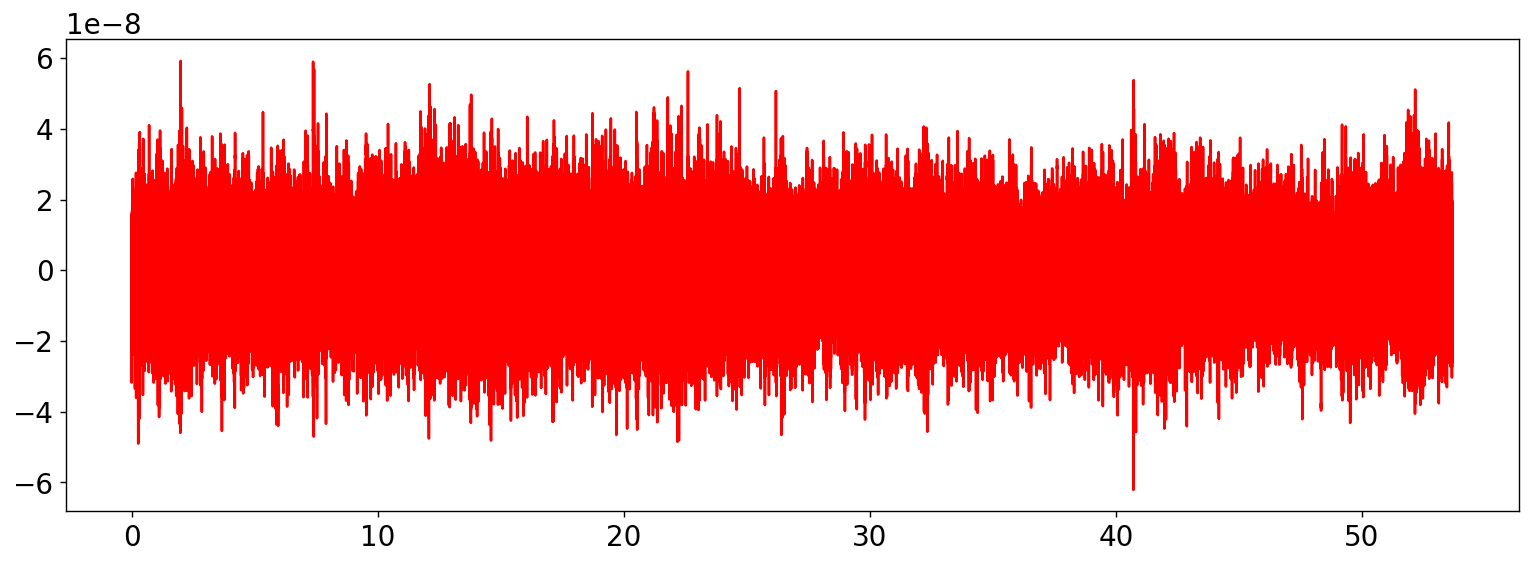

In [4]:
samp_freq = 19531.25
dt = 1/samp_freq
time_m = np.arange(0, len(matlab_channel)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_m, matlab_channel*1e-4, 'r')

plt.show()

# My python code

In [23]:
f_data = open(file_name, "rb")  # reopen the file
x = f_data.read()

In [24]:
xs = bytearray(b'\x00\x1b\xcf')
xs.append(0)
print(xs)
struct.unpack('>i', b'\x00\x1b\xcf\x00')[0], int.from_bytes(xs, byteorder='big', signed=True)

bytearray(b'\x00\x1b\xcf\x00')


(1822464, 1822464)

In [215]:
pos = 1024
l = (len(x[1024:])//128)
npts = 1048576

channel1 = np.empty(0, dtype = np.float32)
channel2 = np.empty(0, dtype = np.float32)
channel3 = np.empty(0, dtype = np.float32)
channel4 = np.empty(0, dtype = np.float32)
for loc in range(pos,l//10, 12):
    
#     d = x[loc:loc+3]
#     dpoint = unpack_24bit(struct.unpack('BBB', d))
#     channel1 = np.append(channel1, dpoint)
    
    d = bytearray(x[loc:loc+3])
    d.append(0)
    dpoint = int.from_bytes(d, byteorder='big', signed=True) * (2.5/(2**23)/20)
    channel1 = np.append(channel1, dpoint)
    
    


In [216]:
len(matlab_channel),len(channel1)

(1048576, 104781)

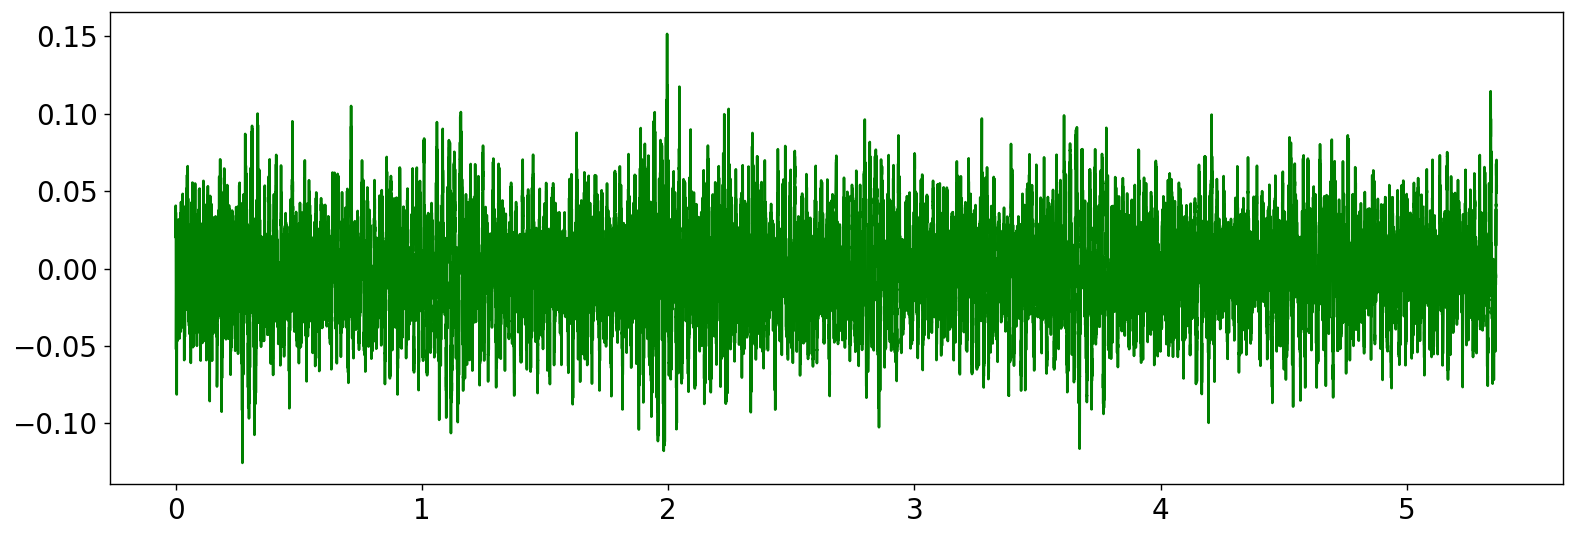

In [217]:
samp_freq = 19531.25
dt = 1/samp_freq
time_p = np.arange(0, len(channel1)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_p, channel1, 'g')
plt.show()

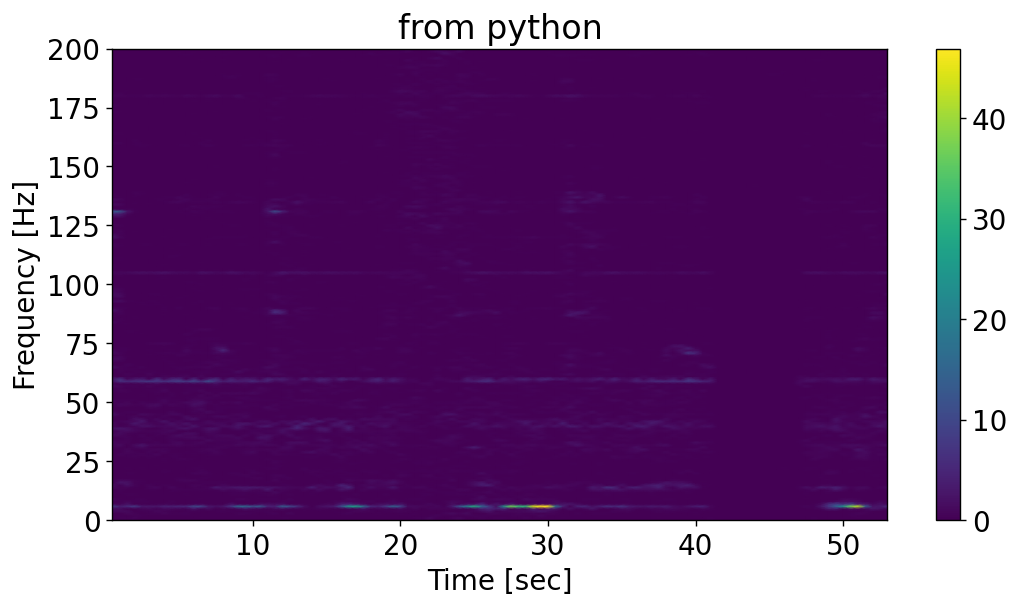

In [214]:
f, t, Sxx = signal.spectrogram(channel1, samp_freq, nperseg=int(samp_freq), noverlap=int(samp_freq//2))
plt.figure(figsize=(10,5))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(10,20)
plt.ylim(0,200)
# plt.clim(-10, -5)
plt.colorbar()
plt.title('from python')
plt.show()

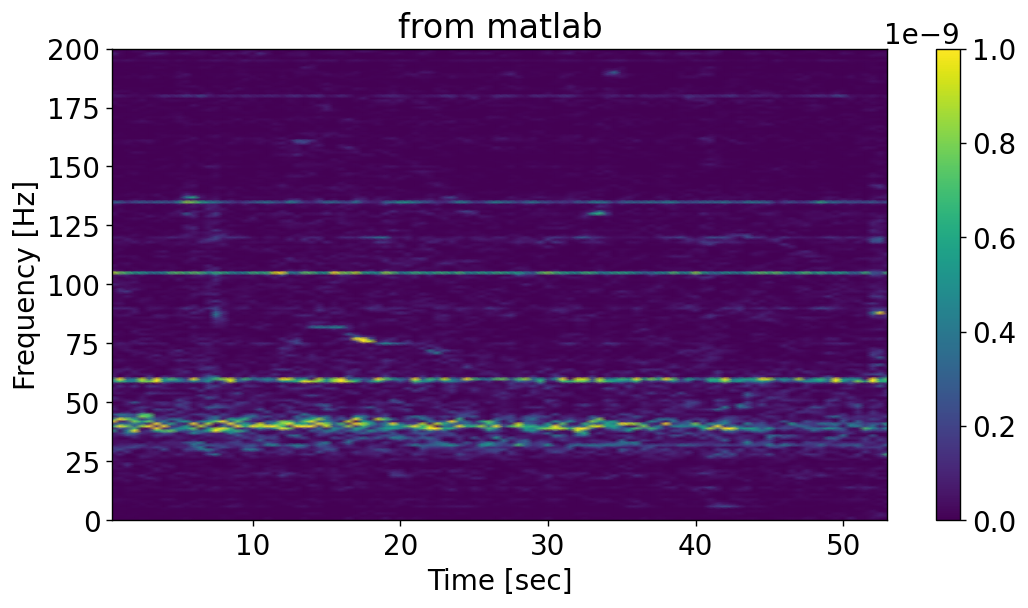

In [146]:

f, t, Sxx = signal.spectrogram(matlab_channel, samp_freq, nperseg=int(samp_freq), noverlap=int(samp_freq//2))
plt.figure(figsize=(10,5))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(10,20)
plt.ylim(0,200)
plt.clim(0,1e-9)
plt.colorbar()
plt.title('from matlab')
plt.show()

In [96]:
pos = 1610908684
d = bytearray(x[pos:pos+3])

def unpack_24bit(bytes):
     return bytes[0] | (bytes[1] << 8) | (bytes[2] << 16)

a = unpack_24bit(struct.unpack('BBB', d))


error: unpack requires a buffer of 3 bytes

In [97]:
a, struct.unpack('BBB', d), d[0], (d[1] << 8) , (d[2] << 16) , (d[1] << 8) + (d[2] << 16) 

error: unpack requires a buffer of 3 bytes

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_p = np.arange(0, len(chanel1)*dt, dt)
time_m = np.arange(0, len(matlab_channel)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_p, chanel1, 'g')
plt.plot(time_m, matlab_channel*1e-4, 'r')

plt.xlim(0.1, 1)
plt.show()

In [ ]:
chanel1[100000:100010]

In [ ]:
import pyoad

In [ ]:
int.from_bytes(d, byteorder='big', signed=False) * (2.5/(2**23)/20)

In [ ]:
f_data = open(file_name, "rb")  # reopen the file
# f_data.seek(D['reclen'][0], os.SEEK_SET)  # seek

x = f_data.read()
# x = np.fromfile(f_data, dtype='>u1')  # read the data into numpy

In [ ]:
data = struct.unpack("i" * ((len(x) -24) // 4), x[20:-4])

In [ ]:
len(data[1024:]) , len(chanel1)